In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib

from datetime import datetime

from APIs import goldenAndDeathCross as gdc
from APIs import stochasticOscillators as so
from APIs import general_APIs as general
from APIs import percentagePriceOscillator as ppo
from APIs import movingAverageConvergenceDivergence as macd
from APIs import relativeStrengthIndex as rsi

companyName ='GOOG'

# Golden cross and/or death cross detection

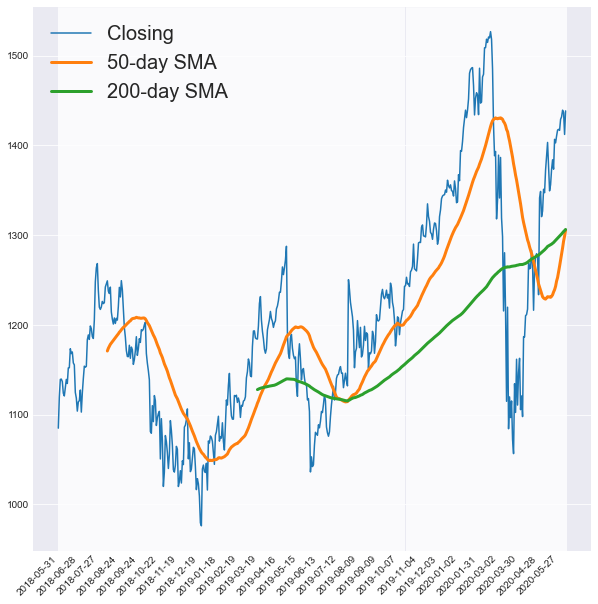

In [2]:
gdc.analyzeGoldenAndDeathCross(companyName, nDays_short=50, nDays_long=200, start='2018-05-31')

# Fast stochastic oscillators

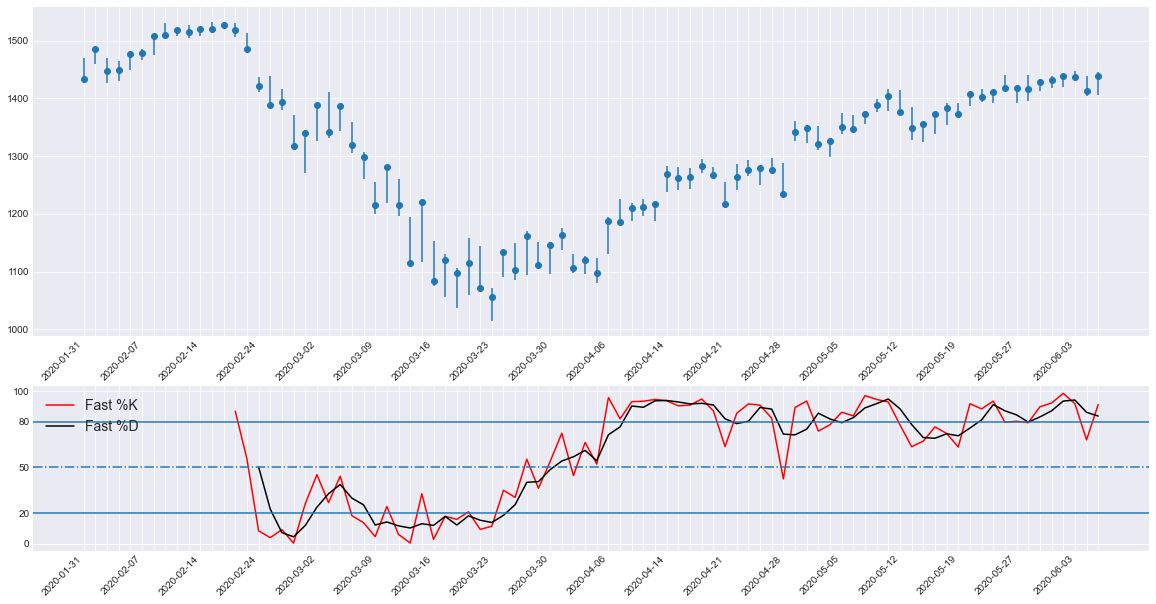

In [3]:
so.computeAndPlotFastStochasticOscillator(companyName, n1=14, n2=3, start='2020-01-31', every_nth = 5)

# Slow stochastic oscillators

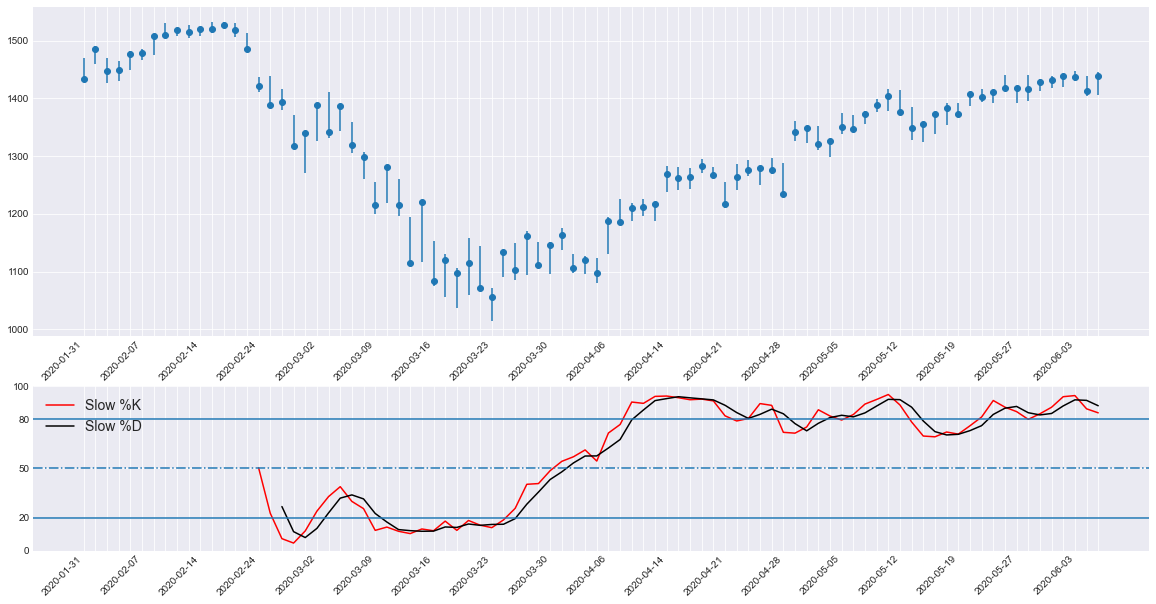

In [4]:
so.computeAndPlotSlowStochasticOscillator(companyName, n1=14, n2=3, start='2020-01-31', every_nth = 5)

# Full stochastic oscillators

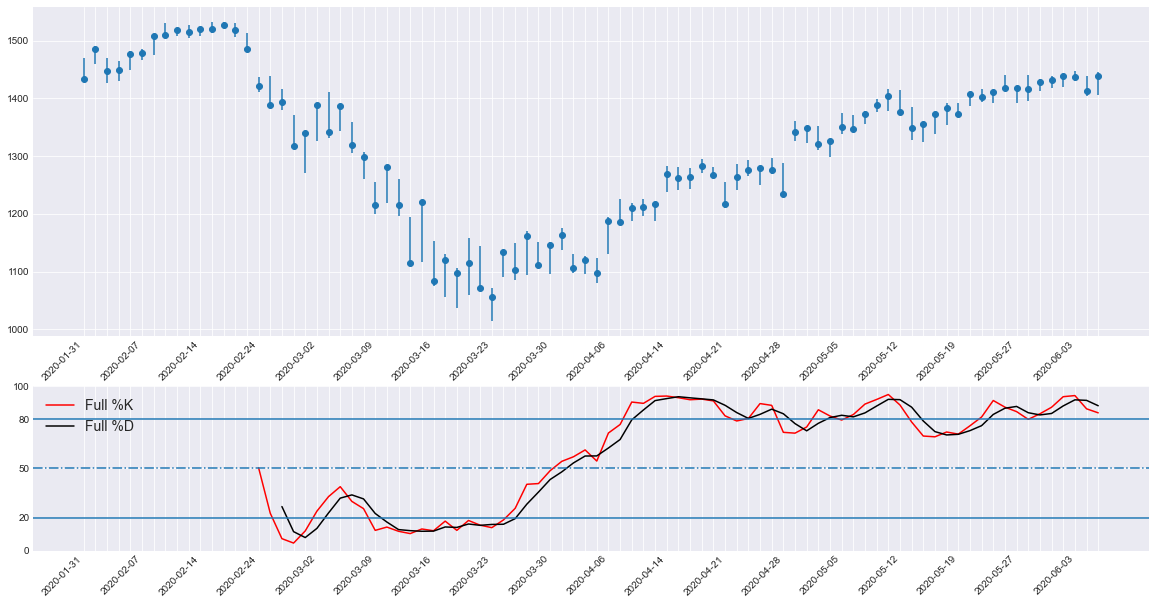

In [5]:
so.computeAndPlotFullStochasticOscillator(companyName, n1=14, n2=3, n3=3, start='2020-01-31', every_nth = 5)

# Percentage Price Oscillator

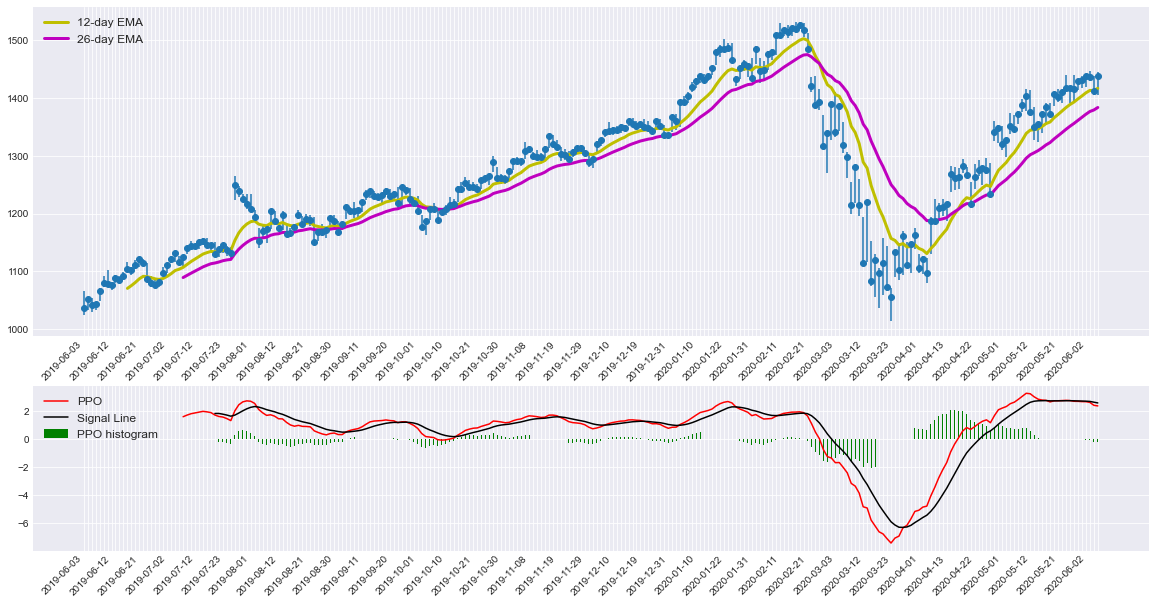

In [6]:
ppo.computeAndPlotPercentagePriceOscillator(companyName, start='2019-06-01', every_nth=7)

# Moving Average Convergence Divergence

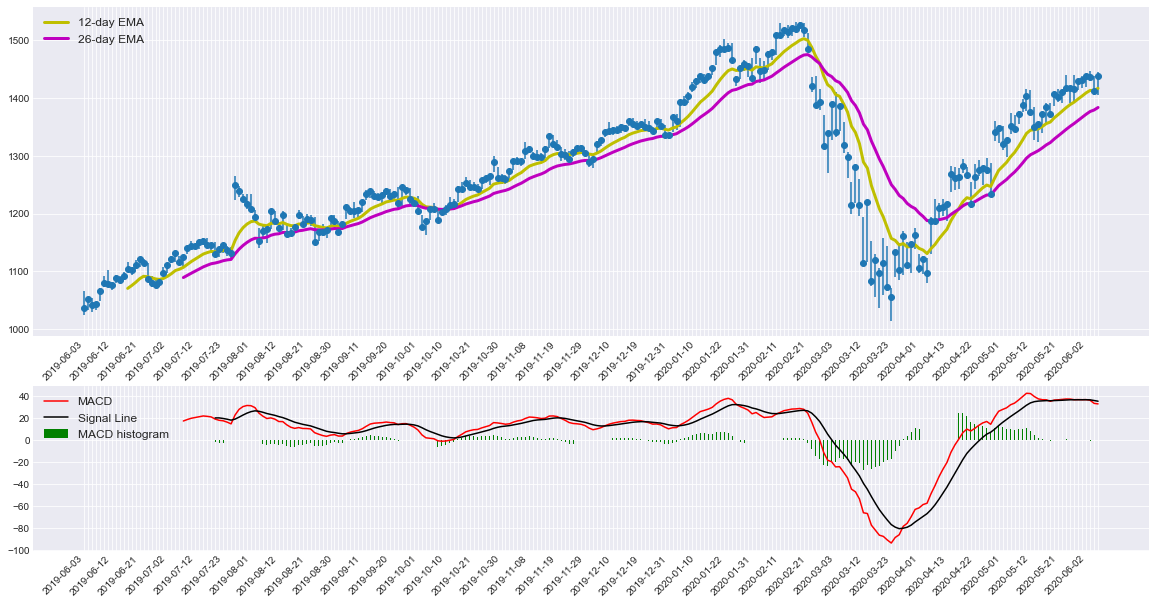

In [7]:
macd.getMACD(companyName, start='2019-06-01', every_nth=7)

# Relative Strength Index

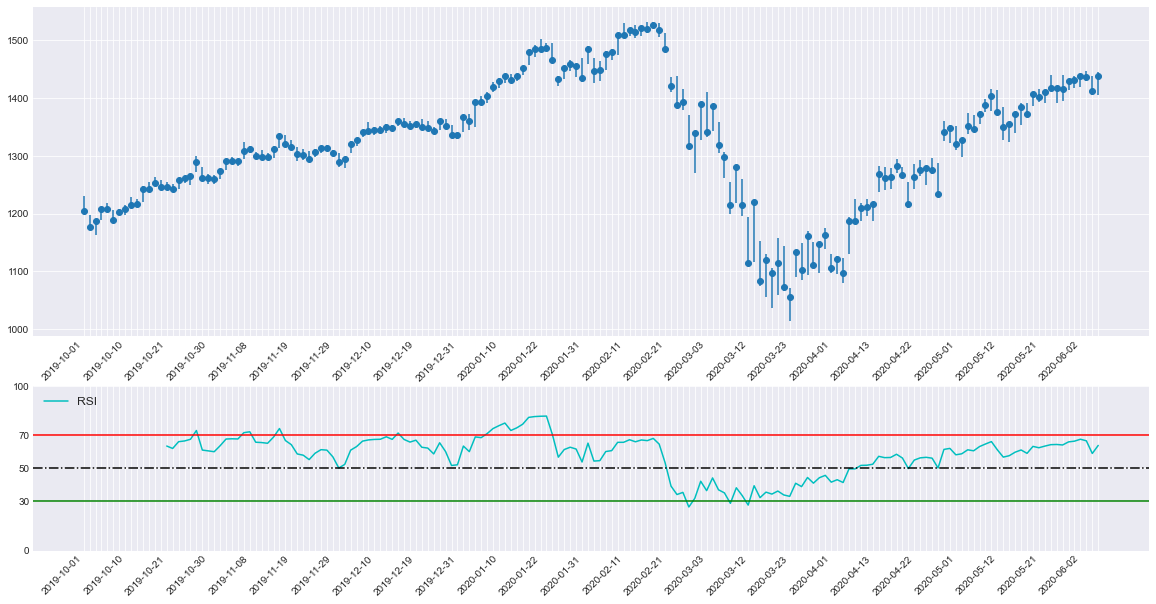

In [9]:
rsi.getRSI(companyName, start='2019-10-01', every_nth=7)